# Importing all required packages and modules

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

# Loading the dataset(csv file) through read_csv()

In [3]:
df = pd.read_csv('winequality.csv')

# Observing the rows and columns of the dataset

In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Observing the statistical details of the dataset

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Preparing the dependent and independent attributes

In [7]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates','alcohol']]
y = df['quality']

# Dataset contains any null values or not

In [8]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# Visualizing null values through a heat map

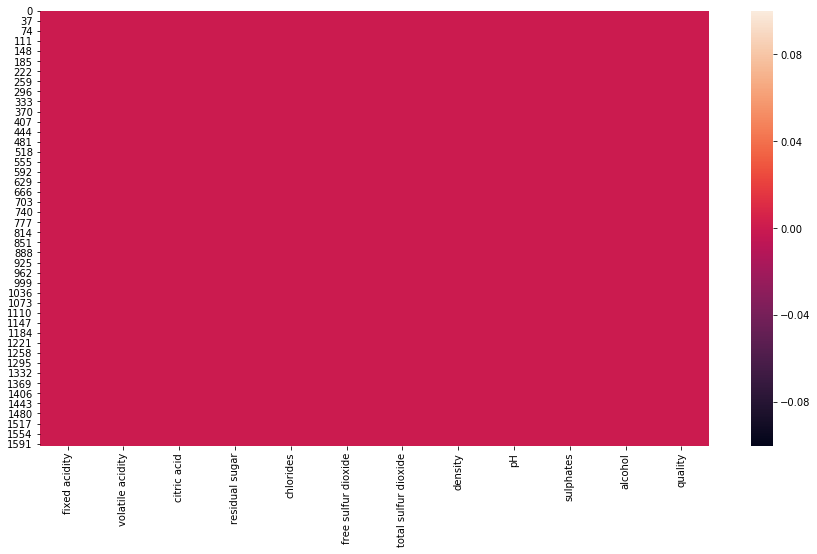

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.isnull())

# Visualizing the distribution of the data

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


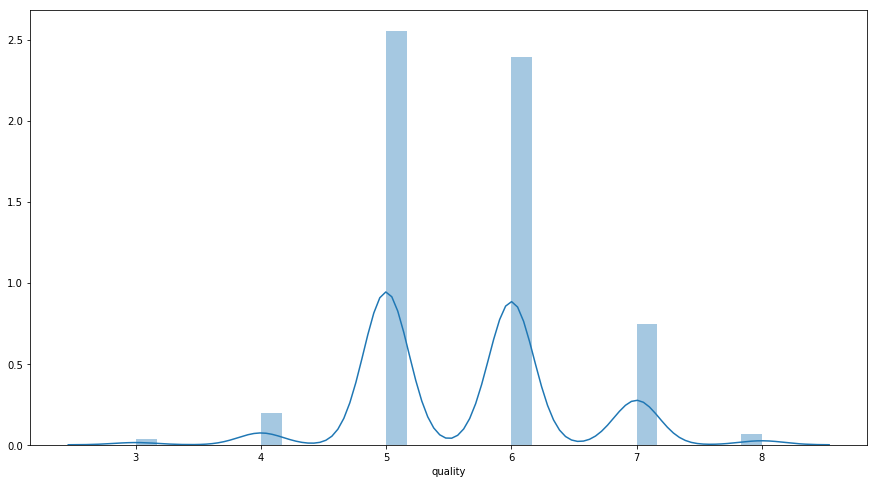

In [10]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.distplot(df['quality'])

In [11]:
# fillna function is not required here as there is no null values
# if any null values found then 
df = df.fillna(method='ffill')

# Correlation of dependent attributes with the predicted label

In [12]:
plt.figure(figsize=(20,20))
test=df.corr()['quality']
test.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<Figure size 1440x1440 with 0 Axes>

# Visualization of the correlation matrix

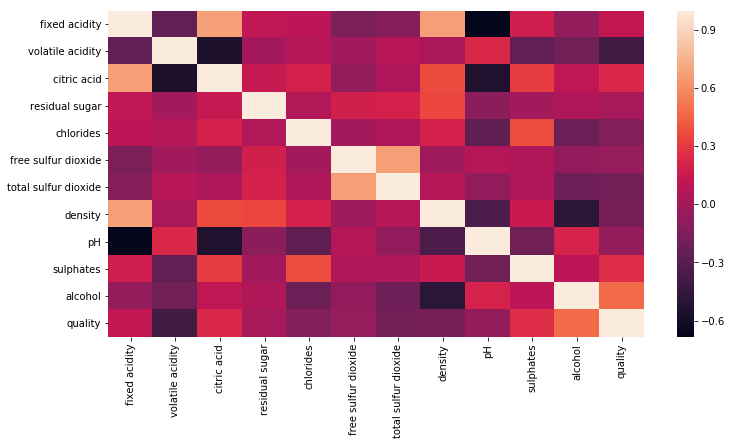

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

Text(0.5,1,'alcohol vs quality')

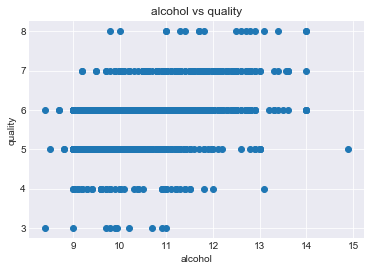

In [14]:
sns.set_style("darkgrid")
plt.scatter(x = 'alcohol', y = 'quality', data = df)
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.title("alcohol vs quality")

Text(0.5,1,'sulphates vs quality')

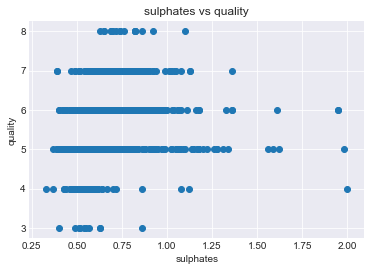

In [15]:
plt.scatter(x = 'sulphates', y = 'quality', data = df)
plt.xlabel("sulphates")
plt.ylabel("quality")
plt.title("sulphates vs quality")

# Spliting the dataset into train and test set 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate and fitting the model with training dataset

In [17]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Coefficients of predicting variables

In [18]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


# Predicting the labels of the test set separately

In [19]:
y_pred = model.predict(X_test)

# Comaparing the actual labels and the predicted labels

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

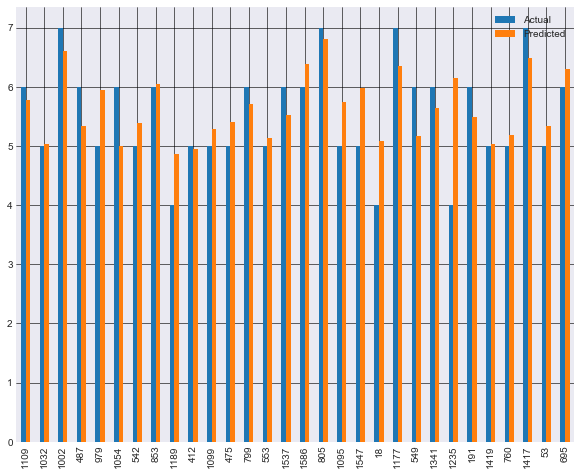

In [26]:
df.head(30).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.6', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.6', color='black')
plt.show()

# Evaluation of the performance of the model

In [26]:
print('MAE:', mean_absolute_error(y_test, y_pred))  
print('MSE:', mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286611193
Mean Squared Error: 0.3844711978201255
Root Mean Squared Error: 0.6200574149384277
